# 70 Dog Breeds Neural Net

**NN**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Rescaling
from keras.preprocessing.image import ImageDataGenerator

In [37]:
bSize = 64
lRate = 0.01
Epochs = 120

In [38]:
data_all = pd.read_csv('dogs.csv')
data_all['labels'] = data_all['labels'].replace(['American  Spaniel'], 'American Spaniel')
breeds = data_all['labels'].unique()
Classes = []
for i in breeds:
    Classes.append(i)

In [40]:
# reference for this ImageDataGenerator image labeling and feeding method:
# https://towardsdatascience.com/a-single-function-to-streamline-image-classification-with-keras-bd04f5cfe6df
# it is a built in function in Keras
train_Gen = ImageDataGenerator(rescale = 1. / 255)
train_genX = train_Gen.flow_from_directory(
    'train',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 7946 images belonging to 70 classes.


In [41]:
test_Gen = ImageDataGenerator(rescale = 1. / 255)
test_genX = test_Gen.flow_from_directory(
    'test',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 700 images belonging to 70 classes.


In [42]:
val_Gen = ImageDataGenerator(rescale = 1. / 255)
val_genX = val_Gen.flow_from_directory(
    'valid',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 690 images belonging to 70 classes.


In [43]:
#Source Used for Data Augmentation
#https://www.tensorflow.org/tutorials/images/data_augmentation

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.3),
  layers.RandomZoom(0.2)
])

In [44]:
cnnModel = Sequential()

cnnModel.add(data_augmentation)

cnnModel.add(Rescaling((1. / 1), input_shape = (224, 224, 3)))



cnnModel.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))

cnnModel.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))

cnnModel.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))

cnnModel.add(MaxPooling2D((2, 2)))


cnnModel.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))

cnnModel.add(MaxPooling2D((2, 2)))



cnnModel.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))

cnnModel.add(MaxPooling2D((2, 2)))


cnnModel.add(Flatten())


cnnModel.add(Dense(512, activation='relu'))
cnnModel.add(Dense(256, activation='relu'))
cnnModel.add(Dense(128, activation='relu'))

cnnModel.add(Dense(len(Classes), activation='softmax'))

In [47]:

cnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [48]:
history = cnnModel.fit(
    train_genX,
    validation_data = val_genX,
    batch_size = bSize,
    epochs = Epochs
)

Epoch 1/120
125/125 [==============================] - 92s 703ms/step - loss: 0.1105 - accuracy: 0.0190 - val_loss: 0.0757 - val_accuracy: 0.0145
Epoch 2/120
125/125 [==============================] - 88s 700ms/step - loss: 0.0753 - accuracy: 0.0205 - val_loss: 0.0758 - val_accuracy: 0.0145
Epoch 3/120
125/125 [==============================] - 88s 703ms/step - loss: 0.0753 - accuracy: 0.0165 - val_loss: 0.0760 - val_accuracy: 0.0145
Epoch 4/120
125/125 [==============================] - 88s 701ms/step - loss: 0.0747 - accuracy: 0.0242 - val_loss: 0.0744 - val_accuracy: 0.0275
Epoch 5/120
125/125 [==============================] - 88s 703ms/step - loss: 0.0732 - accuracy: 0.0328 - val_loss: 0.0727 - val_accuracy: 0.0217
Epoch 6/120
125/125 [==============================] - 88s 698ms/step - loss: 0.0719 - accuracy: 0.0413 - val_loss: 0.0716 - val_accuracy: 0.0406
Epoch 7/120
125/125 [==============================] - 88s 702ms/step - loss: 0.0705 - accuracy: 0.0517 - val_loss: 0.0686 -

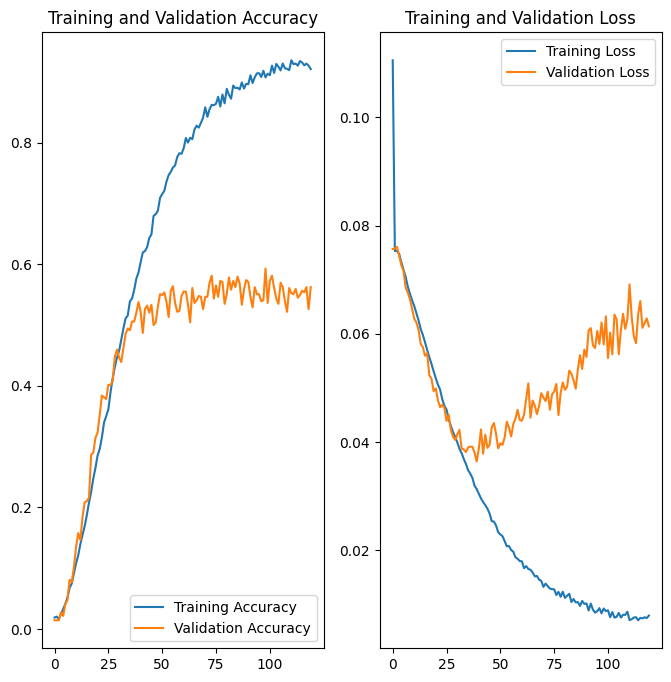

In [49]:
#https://www.tensorflow.org/tutorials/images/classification

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
cnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, None, None, None)  0         
                                                                 
 rescaling_1 (Rescaling)     (None, None, None, None)  0         
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 64)    1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                  